# Aula 7 - Exercícios - Correlação e Regressão
### Consulta a internet (Google, Stackoverflow e etc) liberada!!

In [1]:
# Importe a biblioteca pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

### 7.1 Plote o heatmap da correlação das variáveis do dataframe formado pelo merge do dataset de morbidade com o dataset de gini.
#### O merge desses dois datasets for realizado no exercício 5.5
#### Defina um tamanho de figura 35x35, plote o heatmap com anotações e remova a barra de cores com o argumento cbar=False

In [2]:
# YOUR CODE HERE
# YOUR CODE HERE
def merge_morbidade_gini(path_gini, path_morbidade):
    """retorne o merge dos datasets de população e morbidade.
    """
    # YOUR CODE HERE
    try:
        df_gini = pd.read_csv(path_gini, sep=';', na_values='...', skiprows=2, skipfooter=1, \
                              decimal = ',', \
                              dtype={'1991': float, '2000': float, '2010': float}, engine='python')

        df_gini['cod_ibge6'] = df_gini['Município'].apply( lambda x: str(x.split(' ')[0]) )

        
        df_morbidade = pd.read_csv(path_morbidade, sep=';', decimal=',', na_values='-', \
                                   dtype={'cod_ibge6': str})

        return pd.merge(df_gini, df_morbidade, on='cod_ibge6')
        
    except ValueError as e:
        
        raise NotImplementedError(e)
        
path_morbidade = '../../curso_ciencia_dados2020/data/originais/morbidade/consolidado/morbidade.csv'
path_gini = '../../curso_ciencia_dados2020/data/originais/gini/ginibr.csv'
df_giniMorb = merge_morbidade_gini(path_gini, path_morbidade)
df_giniMorb.head()

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (11,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,Município_x,1991,2000,2010,cod_ibge6,Município_y,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,...,Val_serv_prof_-_compl_gestor,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade,mes,ano,mes_ano
0,110001 Alta Floresta D'Oeste,0.5983,0.5868,0.5893,110001,Alta Floresta D'Oeste,149.0,149,101282.26,77693.11,...,NaN,679.75,"679,75",632.0,"4,2",8.0,"5,37",Abr,2020,2020-04-01
1,110001 Alta Floresta D'Oeste,0.5983,0.5868,0.5893,110001,Alta Floresta D'Oeste,86.0,86,42705.09,34433.05,...,NaN,496.57,"496,57",257.0,"3,0",2.0,"2,33",Jun,2020,2020-06-01
2,110001 Alta Floresta D'Oeste,0.5983,0.5868,0.5893,110001,Alta Floresta D'Oeste,133.0,133,119966.00,91848.09,...,NaN,902.00,"902,00",534.0,"4,0",2.0,"1,50",Mai,2020,2020-05-01
3,110001 Alta Floresta D'Oeste,0.5983,0.5868,0.5893,110001,Alta Floresta D'Oeste,197.0,197,91431.64,71821.68,...,NaN,464.12,"464,12",645.0,"3,3",3.0,"1,52",Mar,2020,2020-03-01
4,110001 Alta Floresta D'Oeste,0.5983,0.5868,0.5893,110001,Alta Floresta D'Oeste,197.0,197,93474.87,76607.12,...,NaN,474.49,"474,49",646.0,"3,3",2.0,"1,02",Fev,2020,2020-02-01


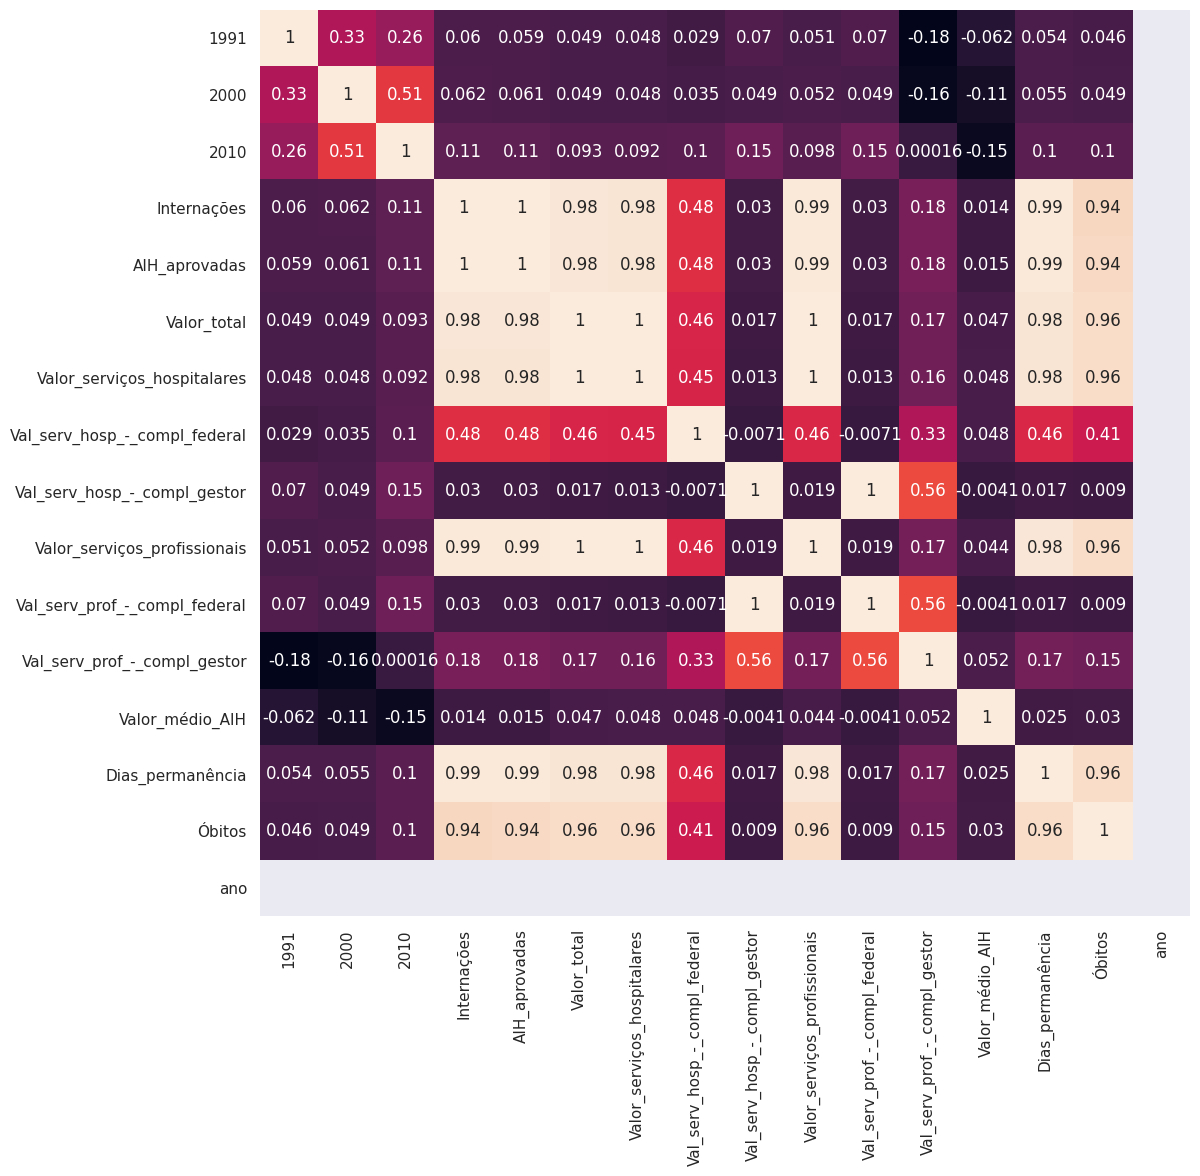

In [25]:
sns.set(rc={'figure.figsize':(12,12), 'figure.dpi':100})
g = sns.heatmap(df_giniMorb.corr(), annot=True, cbar=False)

### 7.2 Plote o heatmap da correlação das variáveis do dataframe formado pelo merge do dataset do IDEB com o dataset de gini.
#### Plote o heatmap com anotações.
#### Colete o valor do IDEB de 2017 da coluna O da tabela do IDEB abaixo. O pandas lê essa coluna com o nome IDEB12_17.
#### path_ideb = '../../curso_ciencia_dados2020/data/originais/ideb/ideb_municipios2017.xlsx'
#### Dica: Construa uma coluna com o código do ibge do município (de 6 caracteres) e faça um slice das colunas do dataframe do IDEB de modo a selecionar apenas as colunas mostradas a seguir:

|    |   cod_ibge6 | NO_MUNICIPIO          |   IDEB12_17 |
|---:|------------:|:----------------------|------------:|
|  1 |      110001 | Alta Floresta D'Oeste |         3.9 |
|  2 |      110002 | Ariquemes             |         3.8 |
|  5 |      110003 | Cabixi                |         3.7 |
|  7 |      110004 | Cacoal                |         3.9 |
|  9 |      110005 | Cerejeiras            |         3.8 |


In [36]:
path_ideb='../../curso_ciencia_dados2020/data/originais/ideb/ideb_municipios2017.xlsx'
df_ideb = pd.read_excel(path_ideb, index_col=0, skiprows=9, skipfooter=3, \
                        na_values='-', dtype={'COD_MUN': str})
df_ideb['cod_ibge6'] = df_ideb['COD_MUN'].apply( lambda x: x[:6] )
df_ideb.reset_index(inplace=True)

df_ideb_sliced = df_ideb[df_ideb['REDE'] == 'Pública'][['cod_ibge6', 'NO_MUNICIPIO', 'IDEB12_17']]
df_ideb_sliced.head()

,cod_ibge6,NO_MUNICIPIO,IDEB12_17
1,110001,Alta Floresta D'Oeste,3.9
2,110002,Ariquemes,3.8
5,110003,Cabixi,3.7
7,110004,Cacoal,3.9
9,110005,Cerejeiras,3.8


In [50]:
path_gini = '../../curso_ciencia_dados2020/data/originais/gini/ginibr.csv'
df_gini = pd.read_csv(path_gini, sep=';', na_values='...', skiprows=2, skipfooter=1, \
                      decimal = ',', \
                      dtype={'1991': float, '2000': float, '2010': float}, \
                      engine='python')

df_gini['cod_ibge6'] = df_gini['Município'].apply( lambda x: x.split(' ')[0] )
df_gini.dropna(inplace=True) # foi preciso retirar os dados nulos para executar o modelo regressão
df_gini.head()

,Município,1991,2000,2010,cod_ibge6
0,110001 Alta Floresta D'Oeste,0.5983,0.5868,0.5893,110001
3,110034 Alvorada D'Oeste,0.5690,0.6534,0.5355,110034
4,110002 Ariquemes,0.5827,0.5927,0.5496,110002
6,110003 Cabixi,0.6527,0.5806,0.5166,110003
8,110004 Cacoal,0.6800,0.5615,0.5890,110004


In [51]:
df_merge_ideb_gini = pd.merge(df_ideb_sliced, df_gini, on='cod_ibge6')
df_merge_ideb_gini.head()

,cod_ibge6,NO_MUNICIPIO,IDEB12_17,Município,1991,2000,2010
0,110001,Alta Floresta D'Oeste,3.9,110001 Alta Floresta D'Oeste,0.5983,0.5868,0.5893
1,110002,Ariquemes,3.8,110002 Ariquemes,0.5827,0.5927,0.5496
2,110003,Cabixi,3.7,110003 Cabixi,0.6527,0.5806,0.5166
3,110004,Cacoal,3.9,110004 Cacoal,0.6800,0.5615,0.5890
4,110005,Cerejeiras,3.8,110005 Cerejeiras,0.5958,0.6935,0.5147


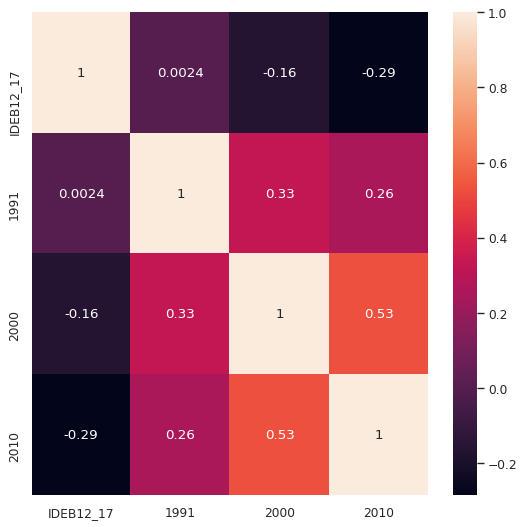

In [52]:
sns.set(rc={'figure.figsize':(8,8), 'figure.dpi':80})
g = sns.heatmap(df_merge_ideb_gini.corr(), annot=True)

### 7.3 Considerando o resultado do merge do exercício 7.2 (que deve conter as colunas cod_ibge6, NO_MUNICIPIO,	IDEB12_17,	Município, 1991, 2000 e 2010) faça uma análise de regressão linear para estimar o valor do IDEB dos municípios baseado nos outros atributos disponíveis nesta agregação.
#### Faça a regressão linear com a biblioteca statsmodel e imprima o sumário do modelo.
#### Comente o potencial explicativo do modelo.
#### Dica: não esqueça de adicionar a constante à formula da regressão.


In [60]:
# YOUR CODE HERE
import statsmodels.api as sm

# Definindo a coluna que vai conter a variavel dependente
y = df_merge_ideb_gini["IDEB12_17"]

# Definindo  a coluna que vai conter a variavel independente
X = df_merge_ideb_gini["2010"]

## adicione o valor de interceptação do eixo y, o b da equação y = ax + b
X = sm.add_constant(X) 

# Fazendo a regressão
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              IDEB12_17   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 27 Aug 2020   Prob (F-statistic):                nan
Time:                        18:42:29   Log-Likelihood:                    nan
No. Observations:                4414   AIC:                               nan
Df Residuals:                    4412   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
2010              nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# Repitindo o procedimento acima passando duas variaveis independentes ao modelo
X = df_merge_ideb_gini[['1991','2000', '2010']]
y = df_merge_ideb_gini['IDEB12_17']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              IDEB12_17   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 27 Aug 2020   Prob (F-statistic):                nan
Time:                        19:32:56   Log-Likelihood:                    nan
No. Observations:                4414   AIC:                               nan
Df Residuals:                    4410   BIC:                               nan
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
1991              nan        nan        nan        nan         nan         nan
2000              nan        nan        nan        nan         nan         nan
2010              nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         30.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# Calculando as predições
predictions = model.predict(X)

predictions[:10]

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
dtype: float64

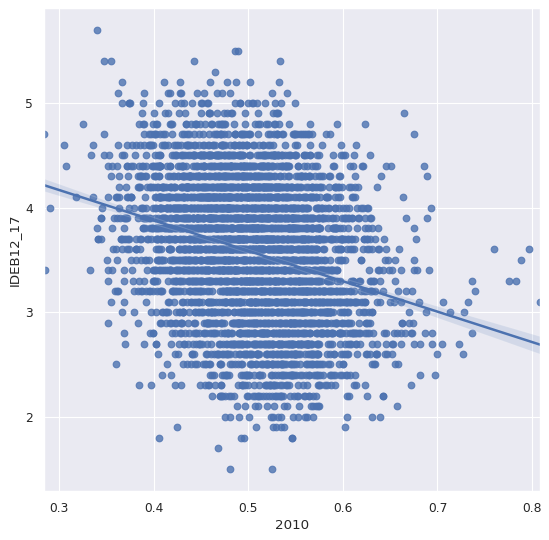

In [68]:
sns.regplot(x="2010", y='IDEB12_17', data=df_merge_ideb_gini)

# --------------------------------------
# Comentários do aluno Halisson Gomides

# 1. Pode-se inferir que não há precisão nas predições pois o erro padrão nem pôde ser calculado
# 2. A maior parte da amostra esta distante da curva, 
# aparentando que as variáveis analisadas tem pouca relação com a nota do IDEB
# 3. o P-value não pôde ser estimado para nenhuma das variáveis do modelo (1991,2000,2010),
# o que indica que essas variáveis não tem relação com a variável alvo, ou tem pouca relação 
# --------------------------------------

### 7.4 Considerando o dataset Duncan (indicado a seguir) faça uma análise de regressão linear para estimar o valor da variavel prestige baseado nos valores dos atributos income e education.
#### Faça a regressão linear com a biblioteca statsmodel e imprima o sumário do modelo.
#### Comente o potencial explicativo do modelo.
#### Dica: não esqueça de adicionar a constante à formula da regressão.

In [69]:
import statsmodels.api as sm
data_prestige = sm.datasets.get_rdataset("Duncan", "carData")
print(data_prestige.__doc__)

====== ===============
Duncan R Documentation
====== ===============

Duncan's Occupational Prestige Data
-----------------------------------

Description
~~~~~~~~~~~

The ``Duncan`` data frame has 45 rows and 4 columns. Data on the
prestige and other characteristics of 45 U. S. occupations in 1950.

Usage
~~~~~

::

   Duncan

Format
~~~~~~

This data frame contains the following columns:

type
   Type of occupation. A factor with the following levels: ``prof``,
   professional and managerial; ``wc``, white-collar; ``bc``,
   blue-collar.

income
   Percentage of occupational incumbents in the 1950 US Census who
   earned $3,500 or more per year (about $36,000 in 2017 US dollars).

education
   Percentage of occupational incumbents in 1950 who were high school
   graduates (which, were we cynical, we would say is roughly equivalent
   to a PhD in 2017)

prestige
   Percentage of respondents in a social survey who rated the occupation
   as “good” or better in prestige

Source
~~~~~~



In [89]:
# YOUR CODE HERE
df = data_prestige.data

# Definindo a coluna que vai conter a variavel dependente
y = df["prestige"]

# Definindo  a coluna que vai conter a variavel independente
X = df[['income', 'education']]

## adicione o valor de interceptação do eixo y, o b da equação y = ax + b
X = sm.add_constant(X) 

# Fazendo a regressão
model = sm.OLS(y, X).fit()


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Thu, 27 Aug 2020   Prob (F-statistic):           8.65e-17
Time:                        20:32:08   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.0647      4.272     -1.420      0.163     -14.686       2.556
income         0.5987      0.120      5.003      0.000       0.357       0.840
education      0.5458      0.098      5.555      0.000       0.348       0.744
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.520
Skew:                           0.155   Prob(JB):                        0.771
Kurtosis:                       3.426   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
# --------------------------------------
# Comentários do aluno Halisson Gomides

# 1. Coeficiente R² (R-squared), que varia entre 0 e 1 deu 0.828. Diz o quanto o modelo está prevendo 
# corretamente. Quanto mais proximo de 1, melhor. Nesse caso, pode-se concluir que não está ruim
# 2. O "t" de valor > 5 indicar que podemos rejeitar a hipótese nula, ou seja, que as variáveis não
# tem relação uma com a outra
# --------------------------------------


predictions = model.predict(X)

predictions[:10]

accountant    77.998488
pilot         78.527477
architect     89.057018
author        75.990694
chemist       79.195954
minister      52.358775
professor     83.016791
dentist       96.417354
reporter      81.537986
engineer      83.985816
dtype: float64

Text(0.5, 1.0, 'Prestige x Education')

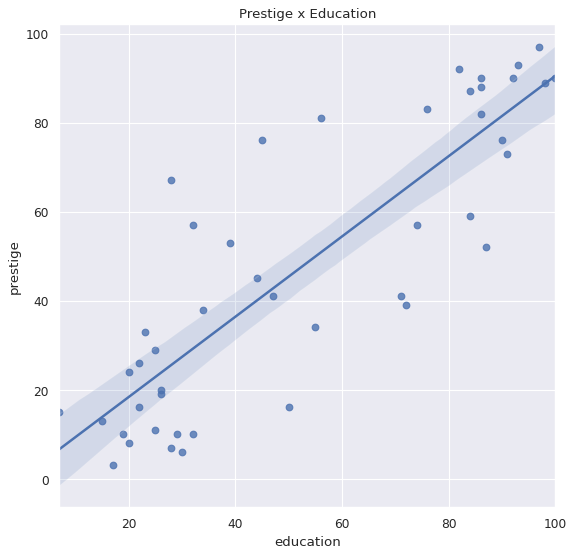

In [126]:

g1 = sns.regplot(x="education", y='prestige', data=df)
g1.set_title("Prestige x Education")

Text(0.5, 1.0, 'Prestige x Income')

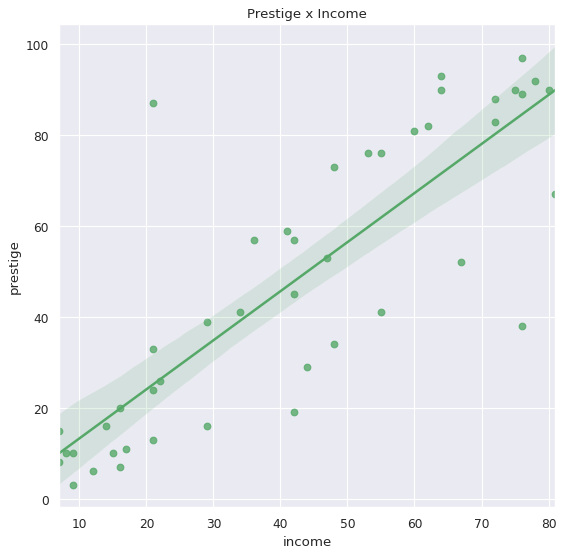

In [127]:
# pal = dict(prof="red", wc="grey", bc="blue")
# g = sns.FacetGrid(df, hue='type', palette=pal, size=7);
# # g.map(plt.scatter, "income", "prestige", s=50, alpha=.9, linewidth=.7, edgecolor="white")
# g.map(sns.regplot, "income", "prestige", ci=None, robust=.1)
# g.map(sns.regplot, "education", "prestige", ci=None, robust=1)
# g.add_legend();

g2 =sns.regplot(x="income", y='prestige', data=df, label='income', \
                color='g')
g2.set_title("Prestige x Income")